In [216]:
import numpy as np
import scipy as sc
from math import exp
import matplotlib.pyplot as plt

In [204]:
inputSize = 3
hiddenSize = 3
outputSize = 2
eps = 0.2
start = np.array([1,2,3])
function = lambda x: pow(x[0],2) - pow(x[1],2) + pow(x[2],2)

In [205]:
def classify(x):
    arr = []
    for i in x:
        if i > np.mean(x):
            arr.append(1)
        else:
            arr.append(0)
    return arr

In [206]:
def val20(x, func):
    x = x - np.ones(3)
    x_val = []
    y_val = []
    for i in range(3):
        for j in range(3):
            for k in range(3):
                x_val.append(np.array([x[0]+i,x[1]+j,x[2]+k]))
                y_val.append(func(x_val[-1]))
    return np.array(x_val),y_val
x, y = val20(start, function)  

In [207]:
class Neural_Network(object):
    def __init__(self, i, h, o):
        #parameters
        self.inputSize = i
        self.outputSize = o
        self.hiddenSize = h

        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize)
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize)

    def forward(self, X):
        #forward propagation through our network
        self.z = np.dot(X, self.W1) # dot product of X (input) and first set of weights
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of weights
        o = self.sigmoid(self.z3) # final activation function
        return o 

    def sigmoid(self, s):
        # activation function 
        return 1/(1+np.exp(-s))

    def sigmoidPrime(self, s):
        #derivative of sigmoid
        return s * (1 - s)

    def backward(self, X, y, o):
        # backward propgate through the network
        self.o_error = y - o # error in output
        self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

        self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

        self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
        self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

    def train (self, X, y):
        o = self.forward(X)
        self.backward(X, y, o)

In [208]:
NN = Neural_Network(inputSize, hiddenSize, outputSize)
loss_arr = []
for i in range(1000): # trains the NN 1,000 times
    #print ("Input:" + str(X))
    #print ("Actual Output:" + str(Y))
    #print ("Predicted Output:" + str(NN.forward(X))) 
    loss = np.mean(np.square(Y - NN.forward(X)))
    loss_arr.append(loss)
    print ("Loss: \n" + str(loss)) # mean sum squared loss
    NN.train(X, Y)

Loss: 
0.27927481055443976
Loss: 
0.27550869484794344
Loss: 
0.19969360162185804
Loss: 
0.17001708769967366
Loss: 
0.16936304944290445
Loss: 
0.16858889078609135
Loss: 
0.1670057021613186
Loss: 
0.164630494761843
Loss: 
0.16409147732946663
Loss: 
0.18989431331422033
Loss: 
0.2179328584582273
Loss: 
0.17838140554410464
Loss: 
0.17083976690719901
Loss: 
0.16897878354122242
Loss: 
0.16712604937922174
Loss: 
0.16563823582463252
Loss: 
0.16426307616229655
Loss: 
0.17115490904894526
Loss: 
0.20192758025284055
Loss: 
0.1782152474034169
Loss: 
0.16996035891262676
Loss: 
0.16989317144443236
Loss: 
0.17721890657964878
Loss: 
0.17176966811365693
Loss: 
0.16812620603939174
Loss: 
0.16441684625215325
Loss: 
0.1550770423120809
Loss: 
0.15278532107013693
Loss: 
0.19378169068178505
Loss: 
0.19419283461319334
Loss: 
0.19479041241229633
Loss: 
0.17400494076403264
Loss: 
0.16658350369058028
Loss: 
0.18433364796341678
Loss: 
0.19067941723483747
Loss: 
0.17566730444743173
Loss: 
0.17114242261136578
Loss: 


Loss: 
0.10963442300032214
Loss: 
0.10962583003611413
Loss: 
0.10962566276965842
Loss: 
0.10961705326785856
Loss: 
0.1096170462258084
Loss: 
0.10960840572434101
Loss: 
0.10960857207368047
Loss: 
0.10959988551096667
Loss: 
0.1096002391552737
Loss: 
0.10959149080638869
Loss: 
0.10959204640789301
Loss: 
0.10958321982448041
Loss: 
0.1095839928145458
Loss: 
0.1095750707707963
Loss: 
0.10957607734647723
Loss: 
0.10956704179390063
Loss: 
0.10956829889812811
Loss: 
0.10955913093225499
Loss: 
0.10956065621521949
Loss: 
0.10955133605772305
Loss: 
0.10955314781718446
Loss: 
0.10954365481716742
Loss: 
0.10954577191576714
Loss: 
0.10953608457405746
Loss: 
0.10953852633226478
Loss: 
0.10952862235244083
Loss: 
0.10953140841656385
Loss: 
0.10952126478602665
Loss: 
0.10952441497174782
Loss: 
0.10951400807541589
Loss: 
0.10951754218856297
Loss: 
0.10950684795665229
Loss: 
0.10951078559432913
Loss: 
0.10949977968418899
Loss: 
0.1095041400208821
Loss: 
0.10949279803103153
Loss: 
0.10949759959576495
Loss: 

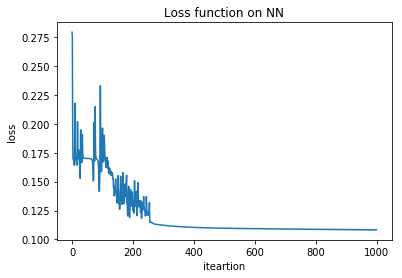

In [221]:
iteration = np.arange(1000)
plt.plot(iteration, loss_arr)
plt.title('Loss function on NN')
plt.xlabel('iteartion')
plt.ylabel('loss')
plt.show()